# - 군집을 위한 데이터 전처리

## 0. 필요 라이브러리 불러오기

In [1]:
import pandas as pd 
import numpy as np

## 1. 데이터 불러오기

In [48]:
kio_data=pd.read_csv("data/final_concat_data.csv")
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,2,0,0,2,0,0,1,05-16,14,일
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,0,1,0,2,0,0,05-16,15,일
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,0,3,3,0,0,0,05-16,15,일
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,3,0,0,0,0,0,0,05-16,15,일
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,2,0,0,2,0,0,0,05-16,16,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30396,2021-05-18 17:00:00,남자,청년,수도권,우울,일식,양식,중식,21.9,0.0,...,3,0,0,0,0,1,0,05-18,17,화
30397,2021-05-16 17:00:00,여자,중장년,경상도,중립,중식,한식,분식,20.1,2.2,...,0,0,0,0,0,0,3,05-16,17,일
30398,2021-05-16 18:00:00,남자,청년,경상도,중립,일식,한식,분식,19.7,2.7,...,3,0,3,0,0,0,0,05-16,18,일
30399,2021-05-18 20:00:00,여자,중장년,경상도,우울,한식,분식,일식,17.4,0.0,...,0,1,0,0,0,0,0,05-18,20,화


## 2. 데이터 전처리

### 1) 휴일 컬럼 생성
* 평일  / 주말

* 설문 데이터셋의 경우 기간이 짧아 모든 요일을 반영하기 어렵다고 판단

In [49]:
for i in range(len(kio_data)):
    if kio_data.loc[i,"요일"]=="일":
        kio_data.loc[i,"휴일"]= "주말"
    else:
        kio_data.loc[i,"휴일"]= "평일"
        
        
kio_data['휴일'] = kio_data['휴일']

In [50]:
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,0,0,2,0,0,1,05-16,14,일,주말
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,1,0,2,0,0,05-16,15,일,주말
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,3,3,0,0,0,05-16,15,일,주말
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,0,0,0,0,0,0,05-16,15,일,주말
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,0,0,2,0,0,0,05-16,16,일,주말
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30396,2021-05-18 17:00:00,남자,청년,수도권,우울,일식,양식,중식,21.9,0.0,...,0,0,0,0,1,0,05-18,17,화,평일
30397,2021-05-16 17:00:00,여자,중장년,경상도,중립,중식,한식,분식,20.1,2.2,...,0,0,0,0,0,3,05-16,17,일,주말
30398,2021-05-16 18:00:00,남자,청년,경상도,중립,일식,한식,분식,19.7,2.7,...,0,3,0,0,0,0,05-16,18,일,주말
30399,2021-05-18 20:00:00,여자,중장년,경상도,우울,한식,분식,일식,17.4,0.0,...,1,0,0,0,0,0,05-18,20,화,평일


### 2) 강수량

* 강수 유무로 변경
* 비 X : 비안옴 , 비 O : 비옴

In [51]:
for i in range(len(kio_data)):
    if kio_data.loc[i,"강수량"] == 0:
        kio_data.loc[i,"비"] = "비안옴"
    else:
        kio_data.loc[i,"비"]="비옴"
        
        
kio_data['비'] = kio_data['비']

### 3) 전운량 
* [기상청 전운량](https://www.weather.go.kr/weather/climate/past_cal.jsp)을 기준으로 하여 
* 맑음(0\~5) : 0 , 구름많음(6\~8) : 1, 흐림(9\~10) : 2으로 변경


In [52]:
kio_data.loc[(kio_data['전운량']>=0) & (kio_data['전운량']<=5), '구름']="맑음"

kio_data.loc[(kio_data['전운량']>=6) & (kio_data['전운량']<=8), '구름']="구름많음"

kio_data.loc[(kio_data['전운량']>=9) & (kio_data['전운량']<=10), '구름']="흐림"

kio_data['전운량'].unique()

array([10,  9,  6,  7,  8,  5,  2,  1,  4,  0,  3], dtype=int64)

In [53]:
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일,비,구름
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,2,0,0,1,05-16,14,일,주말,비옴,흐림
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,2,0,0,05-16,15,일,주말,비옴,흐림
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,3,0,0,0,05-16,15,일,주말,비옴,흐림
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,0,0,0,0,05-16,15,일,주말,비옴,흐림
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,2,0,0,0,05-16,16,일,주말,비옴,흐림
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30396,2021-05-18 17:00:00,남자,청년,수도권,우울,일식,양식,중식,21.9,0.0,...,0,0,1,0,05-18,17,화,평일,비안옴,맑음
30397,2021-05-16 17:00:00,여자,중장년,경상도,중립,중식,한식,분식,20.1,2.2,...,0,0,0,3,05-16,17,일,주말,비옴,흐림
30398,2021-05-16 18:00:00,남자,청년,경상도,중립,일식,한식,분식,19.7,2.7,...,0,0,0,0,05-16,18,일,주말,비옴,흐림
30399,2021-05-18 20:00:00,여자,중장년,경상도,우울,한식,분식,일식,17.4,0.0,...,0,0,0,0,05-18,20,화,평일,비안옴,맑음


### 4) 시간대
* 아침(나머지) : 0 , 점심(11\~16) : 1, 저녁(16\~23) : 2으로 변경

In [54]:
kio_data["시간"].value_counts()

17    5425
16    4348
12    2975
15    2647
14    2556
20    1923
13    1870
9     1717
18    1692
10    1460
21     975
22     719
11     525
23     460
19     448
0      216
7      214
2       82
5       77
6       72
Name: 시간, dtype: int64

In [55]:
for i in range(len(kio_data)):
    if kio_data.loc[i,"시간"]>=16 and kio_data.loc[i,"시간"]<=23:
        kio_data.loc[i,"식사시간"]="저녁"
    elif kio_data.loc[i,"시간"]>=11 and kio_data.loc[i,"시간"]<16:
        kio_data.loc[i,"식사시간"]='점심'
    else:
        kio_data.loc[i,"식사시간"]="아침"
kio_data["식사시간"] = kio_data["식사시간"]

In [56]:
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일,비,구름,식사시간
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,0,0,1,05-16,14,일,주말,비옴,흐림,점심
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,2,0,0,05-16,15,일,주말,비옴,흐림,점심
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,0,0,05-16,15,일,주말,비옴,흐림,점심
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,0,0,0,05-16,15,일,주말,비옴,흐림,점심
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,0,0,0,05-16,16,일,주말,비옴,흐림,저녁
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30396,2021-05-18 17:00:00,남자,청년,수도권,우울,일식,양식,중식,21.9,0.0,...,0,1,0,05-18,17,화,평일,비안옴,맑음,저녁
30397,2021-05-16 17:00:00,여자,중장년,경상도,중립,중식,한식,분식,20.1,2.2,...,0,0,3,05-16,17,일,주말,비옴,흐림,저녁
30398,2021-05-16 18:00:00,남자,청년,경상도,중립,일식,한식,분식,19.7,2.7,...,0,0,0,05-16,18,일,주말,비옴,흐림,저녁
30399,2021-05-18 20:00:00,여자,중장년,경상도,우울,한식,분식,일식,17.4,0.0,...,0,0,0,05-18,20,화,평일,비안옴,맑음,저녁


##  클러스터 필요 데이터만 추출 및 전처리

### 인구 통계학부분  더미화
* 기온: 수치형 나머지:범주형
 
 기온을 제외한 나머지 범주형 데이터 더미화

In [57]:
# 더미화가 가능한 데이터만 추출
cate_data=kio_data[["성별","연령대","기분","구름","휴일","식사시간","비"]]

In [58]:
cate_data.columns

Index(['성별', '연령대', '기분', '구름', '휴일', '식사시간', '비'], dtype='object')

In [59]:
# 더미화
cate_dumy_data=pd.get_dummies(cate_data)
cate_dumy_data

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년,기분_분노,기분_우울,기분_중립,기분_행복,구름_구름많음,구름_맑음,구름_흐림,휴일_주말,휴일_평일,식사시간_아침,식사시간_저녁,식사시간_점심,비_비안옴,비_비옴
0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1
1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1
2,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1
3,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1
4,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30396,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0
30397,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1
30398,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1
30399,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0


In [60]:
# # 더미데이터의 기온 추가
# kate_dumy_data["기온"]=kio_data["기온"]
# kate_dumy_data

In [61]:
kate_dumy_data.columns

Index(['성별_남자', '성별_여자', '연령대_노년', '연령대_중장년', '연령대_청년', '연령대_청소년', '기분_분노',
       '기분_우울', '기분_중립', '기분_행복', '구름_구름많음', '구름_맑음', '구름_흐림', '휴일_주말',
       '휴일_평일', '식사시간_아침', '식사시간_저녁', '식사시간_점심', '비_비안옴', '비_비옴'],
      dtype='object')

In [62]:
# kate_dumy_data.columns(columns={0:'남자',1:'여자',2:'노년',3:'중장년',4:'청년',5:'청소년',6:'분노',7:'우울',8:'중립',
#                9:'행복',10:'구름많음',11:'맑음',12:'흐림',13:'주말',14:'평일',15:'아침',16:'저녁',17:'점심',18:"비안옴",19:"비옴"},inplace=True)

In [63]:
cate_dumy_data.to_csv("data/kate_data.csv",index=False)

### 데이터 표준화 
* 더미데이터와 기온(수치형)데이터 합쳐서 표준화

In [64]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
cate_dumy_data_sd=pd.DataFrame(sd.fit_transform(cate_dumy_data))

In [65]:
#표준화 모델 피클저장
import joblib

joblib.dump(sd, 'data/scalemodel.pkl')

['data/scalemodel.pkl']

In [66]:
cate_dumy_data_sd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.833196,-0.833196,-0.282644,-0.536822,1.188764,-0.635872,-0.222903,-0.488810,-0.646394,1.072381,-0.342931,-0.831271,1.028125,1.340344,-1.340344,-0.380114,-1.053361,1.369432,-1.100081,1.100081
1,-1.200198,1.200198,-0.282644,1.862815,-0.841210,-0.635872,4.486254,-0.488810,-0.646394,-0.932505,-0.342931,-0.831271,1.028125,1.340344,-1.340344,-0.380114,-1.053361,1.369432,-1.100081,1.100081
2,0.833196,-0.833196,-0.282644,-0.536822,1.188764,-0.635872,-0.222903,-0.488810,1.547045,-0.932505,-0.342931,-0.831271,1.028125,1.340344,-1.340344,-0.380114,-1.053361,1.369432,-1.100081,1.100081
3,-1.200198,1.200198,-0.282644,-0.536822,1.188764,-0.635872,-0.222903,-0.488810,-0.646394,1.072381,-0.342931,-0.831271,1.028125,1.340344,-1.340344,-0.380114,-1.053361,1.369432,-1.100081,1.100081
4,0.833196,-0.833196,-0.282644,-0.536822,1.188764,-0.635872,-0.222903,-0.488810,-0.646394,1.072381,-0.342931,-0.831271,1.028125,1.340344,-1.340344,-0.380114,0.949342,-0.730230,-1.100081,1.100081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30396,0.833196,-0.833196,-0.282644,-0.536822,1.188764,-0.635872,-0.222903,2.045783,-0.646394,-0.932505,-0.342931,1.202977,-0.972645,-0.746077,0.746077,-0.380114,0.949342,-0.730230,0.909024,-0.909024
30397,-1.200198,1.200198,-0.282644,1.862815,-0.841210,-0.635872,-0.222903,-0.488810,1.547045,-0.932505,-0.342931,-0.831271,1.028125,1.340344,-1.340344,-0.380114,0.949342,-0.730230,-1.100081,1.100081
30398,0.833196,-0.833196,-0.282644,-0.536822,1.188764,-0.635872,-0.222903,-0.488810,1.547045,-0.932505,-0.342931,-0.831271,1.028125,1.340344,-1.340344,-0.380114,0.949342,-0.730230,-1.100081,1.100081
30399,-1.200198,1.200198,-0.282644,1.862815,-0.841210,-0.635872,-0.222903,2.045783,-0.646394,-0.932505,-0.342931,1.202977,-0.972645,-0.746077,0.746077,-0.380114,0.949342,-0.730230,0.909024,-0.909024


In [67]:
# 본래 열 이름으로 변경
cate_dumy_data_sd.rename(columns={0:'남자',1:'여자',2:'노년',3:'중장년',4:'청년',5:'청소년',6:'분노',7:'우울',8:'중립',
               9:'행복',10:'구름많음',11:'맑음',12:'흐림',13:'주말',14:'평일',15:'아침',16:'저녁',17:'점심',18:"비안옴",19:"비옴"},inplace=True)

In [68]:
cate_dumy_data_sd.columns

Index(['남자', '여자', '노년', '중장년', '청년', '청소년', '분노', '우울', '중립', '행복', '구름많음',
       '맑음', '흐림', '주말', '평일', '아침', '저녁', '점심', '비안옴', '비옴'],
      dtype='object')

## 군집전 컬럼별 상관관계

In [69]:
cate_dumy_data

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년,기분_분노,기분_우울,기분_중립,기분_행복,구름_구름많음,구름_맑음,구름_흐림,휴일_주말,휴일_평일,식사시간_아침,식사시간_저녁,식사시간_점심,비_비안옴,비_비옴
0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1
1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1
2,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1
3,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1
4,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30396,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0
30397,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1
30398,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1
30399,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0


In [70]:
%matplotlib inline 

# 한글 문제 해결
# matplotlib의 기본폰트에서 한글이 지원되지 않음
# 시스템별로 한글 지원하는 폰트로 변경해야 함

import platform
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
## heatmap 그리기 

def corr_heat_map(data,method,figsize):
    # corr
    result=data.corr(method=method)
    
    #figsize
    fig, ax = plt.subplots(figsize=(figsize, figsize))
    
    return sns.heatmap(result,
            annot = True,
           fmt = '.2f',
           cmap = 'Greens',
           vmin = -1, vmax=1)

<AxesSubplot:>

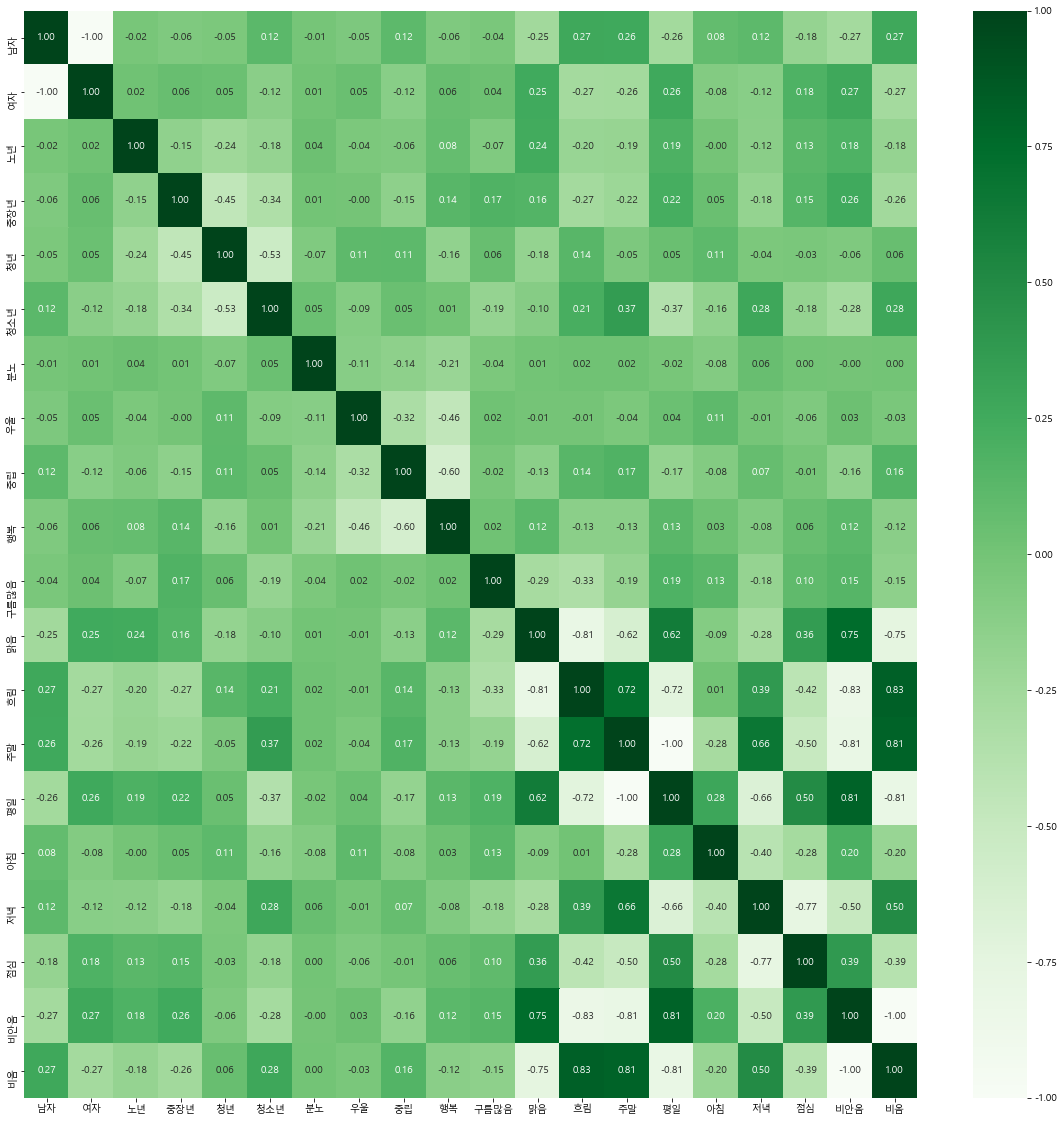

In [71]:
corr_heat_map(cate_dumy_data_sd,"kendall",20)

## Kmeans clustering

In [72]:
cluster_data=cate_dumy_data_sd.copy()
silhuette_data=cate_dumy_data_sd.copy()

### Elbow method

In [96]:

from sklearn.cluster import KMeans

inertia_arr = []

for i in range(2,20):
    kmeans = KMeans(n_clusters=i,
          init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=200)
    kmeans.fit(cluster_data)
    inertia = kmeans.inertia_
    
    print(f'i : {i} \t inertia : {inertia:.2f}')
    
    inertia_arr.append(kmeans.inertia_)
    

inertia_arr = np.array(inertia_arr)

i : 2 	 inertia : 545954.07
i : 3 	 inertia : 460564.37
i : 4 	 inertia : 411036.17
i : 5 	 inertia : 364983.99
i : 6 	 inertia : 329947.62
i : 7 	 inertia : 307913.34
i : 8 	 inertia : 284238.19
i : 9 	 inertia : 265408.18
i : 10 	 inertia : 248805.33
i : 11 	 inertia : 238888.90
i : 12 	 inertia : 232262.55
i : 13 	 inertia : 217619.04
i : 14 	 inertia : 213779.95
i : 15 	 inertia : 213171.80
i : 16 	 inertia : 197239.08
i : 17 	 inertia : 190851.35
i : 18 	 inertia : 186109.00
i : 19 	 inertia : 175547.39


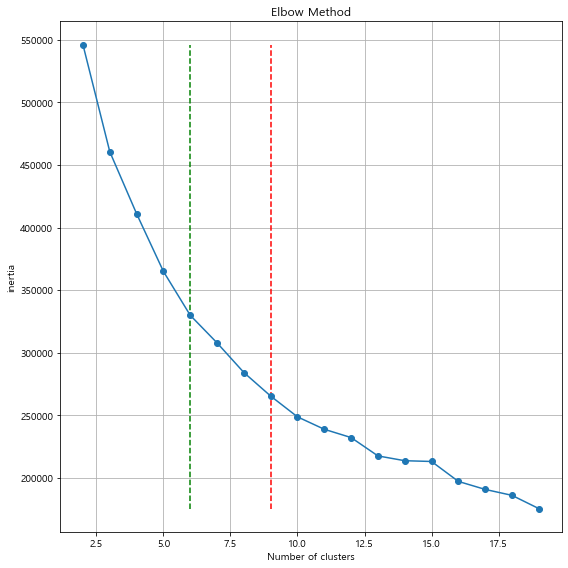

In [97]:
plt.figure(figsize=(8, 8))
plt.plot(range(2,20),inertia_arr, marker='o')
plt.vlines(6, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0004, linestyles='--',colors="g")
plt.vlines(9, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0004, linestyles='--',colors="r")

plt.title("Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel("inertia")
plt.grid()
plt.tight_layout()
plt.show()

In [87]:
# 13로 군집
kmeans = KMeans(n_clusters =13,random_state=200).fit(cluster_data)

#군집 중심점
kmeans.cluster_centers_

array([[ 3.49368841e-01, -3.49368841e-01, -2.82644215e-01,
        -3.60967468e-01,  8.80878744e-01, -4.62755314e-01,
        -2.22903107e-01, -1.52588714e-01,  1.90897503e-01,
         4.11106596e-02, -2.18981280e-01, -7.69941481e-01,
         8.91708605e-01, -5.72853669e-01,  5.72853669e-01,
        -3.80114051e-01, -7.75620479e-01,  1.07824475e+00,
        -1.10008096e+00,  1.10008096e+00,  7.00000000e+00],
       [-2.56538526e-01,  2.56538526e-01, -2.20596796e-01,
        -1.11819588e-01,  7.31884518e-01, -5.65827178e-01,
        -7.35488633e-02,  2.59848788e-01,  1.95527931e-01,
        -3.52949685e-01, -1.05077230e-01, -8.31270856e-01,
         8.82099881e-01,  1.24826114e+00, -1.24826114e+00,
        -3.80114051e-01,  8.95390982e-01, -6.73666689e-01,
        -1.07244329e+00,  1.07244329e+00,  1.00000000e+00],
       [-1.14143896e+00,  1.14143896e+00, -2.82644215e-01,
        -5.36822099e-01, -8.41209573e-01,  1.57264401e+00,
        -1.17488515e-01, -1.60767675e-01, -1.49142907e

In [88]:
# data 군집 결과 컬럼 추가
cluster_data["cluster"]=kmeans.labels_
cluster_data

,남자,여자,노년,중장년,청년,청소년,분노,우울,중립,행복,...,맑음,흐림,주말,평일,아침,저녁,점심,비안옴,비옴,cluster
0,0.833196,-0.833196,-0.282644,-0.536822,1.188764,-0.635872,-0.222903,-0.488810,-0.646394,1.072381,...,-0.831271,1.028125,1.340344,-1.340344,-0.380114,-1.053361,1.369432,-1.100081,1.100081,0
1,-1.200198,1.200198,-0.282644,1.862815,-0.841210,-0.635872,4.486254,-0.488810,-0.646394,-0.932505,...,-0.831271,1.028125,1.340344,-1.340344,-0.380114,-1.053361,1.369432,-1.100081,1.100081,1
2,0.833196,-0.833196,-0.282644,-0.536822,1.188764,-0.635872,-0.222903,-0.488810,1.547045,-0.932505,...,-0.831271,1.028125,1.340344,-1.340344,-0.380114,-1.053361,1.369432,-1.100081,1.100081,0
3,-1.200198,1.200198,-0.282644,-0.536822,1.188764,-0.635872,-0.222903,-0.488810,-0.646394,1.072381,...,-0.831271,1.028125,1.340344,-1.340344,-0.380114,-1.053361,1.369432,-1.100081,1.100081,1
4,0.833196,-0.833196,-0.282644,-0.536822,1.188764,-0.635872,-0.222903,-0.488810,-0.646394,1.072381,...,-0.831271,1.028125,1.340344,-1.340344,-0.380114,0.949342,-0.730230,-1.100081,1.100081,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30396,0.833196,-0.833196,-0.282644,-0.536822,1.188764,-0.635872,-0.222903,2.045783,-0.646394,-0.932505,...,1.202977,-0.972645,-0.746077,0.746077,-0.380114,0.949342,-0.730230,0.909024,-0.909024,4
30397,-1.200198,1.200198,-0.282644,1.862815,-0.841210,-0.635872,-0.222903,-0.488810,1.547045,-0.932505,...,-0.831271,1.028125,1.340344,-1.340344,-0.380114,0.949342,-0.730230,-1.100081,1.100081,1
30398,0.833196,-0.833196,-0.282644,-0.536822,1.188764,-0.635872,-0.222903,-0.488810,1.547045,-0.932505,...,-0.831271,1.028125,1.340344,-1.340344,-0.380114,0.949342,-0.730230,-1.100081,1.100081,1
30399,-1.200198,1.200198,-0.282644,1.862815,-0.841210,-0.635872,-0.222903,2.045783,-0.646394,-0.932505,...,1.202977,-0.972645,-0.746077,0.746077,-0.380114,0.949342,-0.730230,0.909024,-0.909024,4


In [81]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

#추가 라벨이 붙지않는 오리지널 데이터(silhuette_data는 cluster나 silhouette_coeff같은 새 컬럼이 추가 될 예정)
origin_data=silhuette_data.copy()

silhuette_data['cluster'] = kmeans.labels_

# 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(origin_data, silhuette_data['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)
# data 실루엣 계수 컬럼 추가
silhuette_data['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(origin_data, silhuette_data['cluster'])
print('데이터셋 Silhouette Analysis Score:'.format(average_score))
print(average_score)
silhuette_data.head(3)

silhouette_samples( ) return 값의 shape (30401,)
데이터셋 Silhouette Analysis Score:
0.25750539261187294


,남자,여자,노년,중장년,청년,청소년,분노,우울,중립,행복,...,흐림,주말,평일,아침,저녁,점심,비안옴,비옴,cluster,silhouette_coeff
0,0.833196,-0.833196,-0.282644,-0.536822,1.188764,-0.635872,-0.222903,-0.48881,-0.646394,1.072381,...,1.028125,1.340344,-1.340344,-0.380114,-1.053361,1.369432,-1.100081,1.100081,7,0.145126
1,-1.200198,1.200198,-0.282644,1.862815,-0.841210,-0.635872,4.486254,-0.48881,-0.646394,-0.932505,...,1.028125,1.340344,-1.340344,-0.380114,-1.053361,1.369432,-1.100081,1.100081,1,0.035631
2,0.833196,-0.833196,-0.282644,-0.536822,1.188764,-0.635872,-0.222903,-0.48881,1.547045,-0.932505,...,1.028125,1.340344,-1.340344,-0.380114,-1.053361,1.369432,-1.100081,1.100081,7,0.109867


In [82]:
silhuette_data.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.263613
1    0.145818
2    0.171741
3    0.493026
4    0.218483
5    0.223131
6    0.186066
7    0.314445
Name: silhouette_coeff, dtype: float64

### k-means 군집 실루엣 시각화

In [83]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=300, random_state=200)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

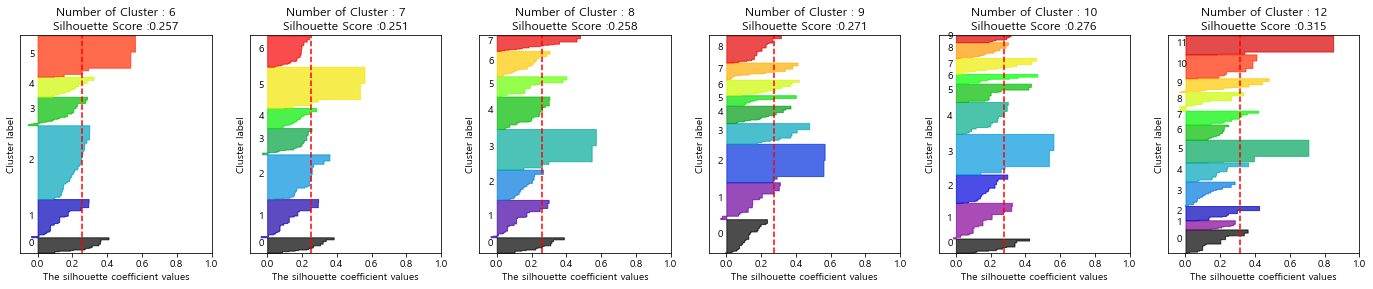

In [84]:
visualize_silhouette([6,7,8,9,10,12], origin_data)

### TSNE로  군집 확인

In [95]:
cluster_data.groupby("cluster")["청소년"].count()

cluster
0    2156
1    5234
2    2457
3    5689
4    3608
5    2813
6    2164
7    1641
8    2486
9    2153
Name: 청소년, dtype: int64

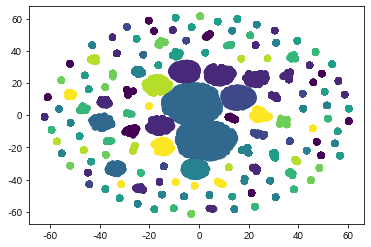

In [92]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(cluster_data.iloc[:,:20])

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=kmeans.labels_)

plt.show()

#군집별로 잘 구분이 된 것을 알 수 있다.

In [91]:
cluster_data.groupby('cluster').mean()[cluster_data.groupby('cluster').mean()>0]

,남자,여자,노년,중장년,청년,청소년,분노,우울,중립,행복,구름많음,맑음,흐림,주말,평일,아침,저녁,점심,비안옴,비옴
cluster,,,,,,,,,,,,,,,,,,,,
0,0.349369,NaN,NaN,NaN,0.880879,NaN,NaN,NaN,0.190898,0.041111,NaN,NaN,0.891709,NaN,0.572854,NaN,NaN,1.078245,NaN,1.100081
1,NaN,0.256539,NaN,NaN,0.731885,NaN,NaN,0.259849,0.195528,NaN,NaN,NaN,0.882100,1.248261,NaN,NaN,0.895391,NaN,NaN,1.072443
2,NaN,1.141439,NaN,NaN,NaN,1.572644,NaN,NaN,NaN,0.313511,NaN,1.202977,NaN,NaN,0.746077,NaN,NaN,0.720818,0.909024,NaN
3,0.833196,NaN,NaN,NaN,NaN,1.453076,0.186841,NaN,0.223425,NaN,NaN,NaN,1.028125,1.340344,NaN,NaN,0.949342,NaN,NaN,1.100081
4,NaN,0.350321,NaN,0.228694,0.336941,NaN,0.128195,0.181368,NaN,0.052156,NaN,0.936856,NaN,NaN,0.746077,NaN,0.949342,NaN,0.909024,NaN
5,0.246960,NaN,NaN,NaN,0.703101,NaN,NaN,0.561789,NaN,NaN,0.476156,NaN,0.249297,NaN,0.746077,2.630789,NaN,NaN,0.525487,NaN
6,NaN,0.031278,3.538017,NaN,NaN,NaN,0.140512,NaN,NaN,0.312674,NaN,0.932246,NaN,NaN,0.746077,0.013641,NaN,0.502982,0.713127,NaN
7,NaN,0.225012,NaN,1.386104,NaN,NaN,NaN,NaN,NaN,0.383316,2.916039,NaN,NaN,NaN,0.746077,NaN,NaN,1.163432,0.909024,NaN
8,NaN,0.077169,NaN,1.862815,NaN,NaN,NaN,NaN,NaN,0.356235,NaN,1.202977,NaN,NaN,0.746077,0.241203,NaN,0.936155,0.909024,NaN


0번군집 : 여자 청년 중립~우울  흐림 주말 저녁
1번군집 : 여자 노년 행복 맑은 평일  점심
2번군집 : 남자 청년 중립 흐림 평일  저녁
3번군집 : 남자 청소년 분노~중립  흐림 주말 저녁
4번군집 : 남자 노년  그나마중립 맑음 평일 점심
6번군집 : 남자 청년 우울 흐림 

## 군집으로 추천

In [91]:
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일,비,구름,식사시간
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,0,0,1,05-16,14,일,주말,비옴,흐림,점심
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,2,0,0,05-16,15,일,주말,비옴,흐림,점심
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,0,0,05-16,15,일,주말,비옴,흐림,점심
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,0,0,0,05-16,15,일,주말,비옴,흐림,점심
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,0,0,0,05-16,16,일,주말,비옴,흐림,저녁
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2021-05-24 16:00:00,남자,노년,경상도,행복,한식,분식,중식,23.8,0.0,...,0,0,1,05-24,16,월,평일,비안옴,맑음,저녁
417,2021-05-24 16:00:00,남자,노년,수도권,행복,한식,일식,중식,22.1,0.0,...,0,1,0,05-24,16,월,평일,비안옴,맑음,저녁
418,2021-05-24 16:00:00,여자,노년,전라도,행복,한식,중식,일식,22.7,0.0,...,2,0,0,05-24,16,월,평일,비안옴,맑음,저녁
419,2021-05-24 16:00:00,남자,노년,전라도,우울,분식,양식,일식,22.7,0.0,...,0,0,0,05-24,16,월,평일,비안옴,맑음,저녁


In [92]:
#본 kio_data에 cluster label 추가
kio_data["cluster"]=kmeans.labels_

In [93]:
kio_data.columns

Index(['시간대', '성별', '연령대', '지역', '기분', '1순위', '2순위', '3순위', '기온', '강수량', '습도',
       '기압', '전운량', '불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥',
       '파스타', '스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕',
       '날짜', '시간', '요일', '휴일', '비', '구름', '식사시간', 'cluster'],
      dtype='object')

In [94]:
## 추천에 필요한 데이터만 추출
recomend_col=['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥',
       '파스타', '스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕',"cluster"]
recomend=kio_data[recomend_col]
recomend

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,cluster
0,3,0,0,0,0,3,0,0,0,0,0,2,0,0,2,0,0,1,6
1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,6
2,1,0,0,0,0,1,0,0,0,2,0,0,0,3,3,0,0,0,5
3,0,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,0,0,6
4,0,0,0,0,0,0,1,0,0,0,3,2,0,0,2,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,0,0,1,2
417,0,0,0,0,3,0,0,0,0,0,0,0,0,2,0,0,1,0,2
418,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,2,0,0,2
419,0,0,0,0,0,0,3,0,0,0,2,0,0,1,0,0,0,0,2


In [95]:
recommend_group=recomend.groupby("cluster").mean().T

recommend_group

cluster,0,1,2,3,4,5,6,7
불고기,0.779221,0.756757,0.739130,0.750000,0.828571,0.819672,0.939394,0.959184
냉면,0.571429,0.432432,0.347826,0.395833,0.771429,0.459016,0.454545,0.306122
칼국수,0.441558,0.270270,0.239130,0.250000,0.500000,0.540984,0.242424,0.244898
된장찌개,0.558442,0.486486,0.413043,0.666667,0.571429,0.803279,0.878788,0.428571
비빔밥,0.545455,0.567568,0.413043,0.687500,0.614286,1.016393,0.606061,0.918367
김치찌개,0.597403,0.567568,0.369565,0.541667,0.514286,0.918033,0.666667,0.408163
떡볶이,0.571429,0.459459,0.260870,0.437500,0.928571,0.622951,0.545455,0.204082
김밥,0.233766,0.162162,0.347826,0.270833,0.400000,0.213115,0.303030,0.204082
파스타,0.740260,0.810811,0.152174,0.687500,0.828571,0.573770,0.606061,0.346939
스테이크,0.909091,0.432432,0.173913,0.375000,0.428571,0.721311,0.242424,0.591837


In [96]:
recommend_group[[1]].sort_values(by=1,ascending=False).head(3).index

Index(['파스타', '돈가스', '불고기'], dtype='object')

## 추천모델 피클로 저장하기

In [97]:
cluster_data.iloc[0,:-1]
    
kmeans.predict(cluster_data.iloc[0,:-1].values.reshape(1, -1))


array([6])

In [98]:
cluster_data.iloc[0,:-1].values.shape

(20,)

In [99]:
### 군집 결과 확인

In [100]:
import joblib

joblib.dump(kmeans, 'data/model.pkl')

['data/model.pkl']

In [101]:
customer_data=cluster_data.iloc[251,:-1]
customer_data.index

Index(['남자', '여자', '노년', '중장년', '청년', '청소년', '분노', '우울', '중립', '행복', '구름많음',
       '맑음', '흐림', '주말', '평일', '아침', '저녁', '점심', '비안옴', '비옴'],
      dtype='object')

In [102]:
model=joblib.load('data/model.pkl')
model.predict(cluster_data.iloc[0,:-1].values.reshape(1, -1))

array([6])

In [103]:
cluster_value=model.predict(cluster_data.iloc[0,:-1].values.reshape(1, -1))[0]

In [104]:
def cluster_result(customer_data):
    
    import joblib
    model=joblib.load('data/model.pkl')
    cluster_value=model.predict(customer_data.values.reshape(1, -1))[0]
    
    return cluster_value

In [105]:
cluster_value=cluster_result(customer_data)
cluster_value

4

## 군집 결과물 jason 파일로 저장

In [106]:
import json
from collections import OrderedDict

file_data= OrderedDict()

In [107]:
recommend_group=np.round(recommend_group,3).to_dict()


In [108]:
file_data["name"]="menu"
file_data["language"]="kor"
file_data["word"]=recommend_group
file_data["number"]=7

In [109]:
json.dumps(file_data ,ensure_ascii=False,indent="\t")

'{\n\t"name": "menu",\n\t"language": "kor",\n\t"word": {\n\t\t"0": {\n\t\t\t"불고기": 0.779,\n\t\t\t"냉면": 0.571,\n\t\t\t"칼국수": 0.442,\n\t\t\t"된장찌개": 0.558,\n\t\t\t"비빔밥": 0.545,\n\t\t\t"김치찌개": 0.597,\n\t\t\t"떡볶이": 0.571,\n\t\t\t"김밥": 0.234,\n\t\t\t"파스타": 0.74,\n\t\t\t"스테이크": 0.909,\n\t\t\t"햄버거": 0.584,\n\t\t\t"초밥": 0.857,\n\t\t\t"우동": 0.571,\n\t\t\t"메밀소바": 0.416,\n\t\t\t"돈가스": 0.61,\n\t\t\t"볶음밥": 0.273,\n\t\t\t"짜장면": 0.61,\n\t\t\t"짬뽕": 0.61\n\t\t},\n\t\t"1": {\n\t\t\t"불고기": 0.757,\n\t\t\t"냉면": 0.432,\n\t\t\t"칼국수": 0.27,\n\t\t\t"된장찌개": 0.486,\n\t\t\t"비빔밥": 0.568,\n\t\t\t"김치찌개": 0.568,\n\t\t\t"떡볶이": 0.459,\n\t\t\t"김밥": 0.162,\n\t\t\t"파스타": 0.811,\n\t\t\t"스테이크": 0.432,\n\t\t\t"햄버거": 0.541,\n\t\t\t"초밥": 0.622,\n\t\t\t"우동": 0.243,\n\t\t\t"메밀소바": 0.432,\n\t\t\t"돈가스": 0.784,\n\t\t\t"볶음밥": 0.27,\n\t\t\t"짜장면": 0.297,\n\t\t\t"짬뽕": 0.243\n\t\t},\n\t\t"2": {\n\t\t\t"불고기": 0.739,\n\t\t\t"냉면": 0.348,\n\t\t\t"칼국수": 0.239,\n\t\t\t"된장찌개": 0.413,\n\t\t\t"비빔밥": 0.413,\n\t\t\t"김치찌개": 0.37,\n\t\t\t"떡볶이": 0.261

In [110]:
with open("data/recommend_group.json", 'w', encoding='utf-8') as make_file:

    json.dump(file_data, make_file, ensure_ascii=False,indent="\t")

In [111]:
import json



with open("data/recommend_group.json", "r", encoding='utf-8') as json_file:
    json_data = json.load(json_file)
    
json_data

{'name': 'menu',
 'language': 'kor',
 'word': {'0': {'불고기': 0.779,
   '냉면': 0.571,
   '칼국수': 0.442,
   '된장찌개': 0.558,
   '비빔밥': 0.545,
   '김치찌개': 0.597,
   '떡볶이': 0.571,
   '김밥': 0.234,
   '파스타': 0.74,
   '스테이크': 0.909,
   '햄버거': 0.584,
   '초밥': 0.857,
   '우동': 0.571,
   '메밀소바': 0.416,
   '돈가스': 0.61,
   '볶음밥': 0.273,
   '짜장면': 0.61,
   '짬뽕': 0.61},
  '1': {'불고기': 0.757,
   '냉면': 0.432,
   '칼국수': 0.27,
   '된장찌개': 0.486,
   '비빔밥': 0.568,
   '김치찌개': 0.568,
   '떡볶이': 0.459,
   '김밥': 0.162,
   '파스타': 0.811,
   '스테이크': 0.432,
   '햄버거': 0.541,
   '초밥': 0.622,
   '우동': 0.243,
   '메밀소바': 0.432,
   '돈가스': 0.784,
   '볶음밥': 0.27,
   '짜장면': 0.297,
   '짬뽕': 0.243},
  '2': {'불고기': 0.739,
   '냉면': 0.348,
   '칼국수': 0.239,
   '된장찌개': 0.413,
   '비빔밥': 0.413,
   '김치찌개': 0.37,
   '떡볶이': 0.261,
   '김밥': 0.348,
   '파스타': 0.152,
   '스테이크': 0.174,
   '햄버거': 0.239,
   '초밥': 0.652,
   '우동': 0.217,
   '메밀소바': 0.391,
   '돈가스': 0.261,
   '볶음밥': 0.391,
   '짜장면': 0.283,
   '짬뽕': 0.304},
  '3': {'불고기': 0.75,
   '냉면':

### 추천결과 

In [ ]:
def recomend_Top3(cluster_value):
    cluster_value=str(cluster_value)
    with open("data/recommend_group.json", "r", encoding='utf-8') as json_file:
        json_data = json.load(json_file)
    
    return sorted(json_data['word'][cluster_value], key= lambda x : json_data['word'][cluster_value][x], reverse=True)[0:3]

In [ ]:
recomend_Top3(cluster_value)